In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import nltk
import re
import string
import csv
from nltk.corpus import stopwords
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
import numpy as np



In [9]:
a=[]
#Opening the file and reading data
with open('final_data2.csv', "r",encoding="Latin1") as f:
    data=csv.reader(f, delimiter=',')
    Date,News,Company,Sentiment,Open,High,Low,Close,Volume=zip(*data)

    
date=list(Date[1:])
news=list(News[1:])
sent=list(Sentiment[1:])
company=list(Company[1:])
open_price=list(Open[1:])
high=list(High[1:])
low=list(Low[1:])
close=list(Close[1:])
volume=list(Volume[1:])
    
    
#     for row[1] in data:
#         a.append(row[1])
sentiment_new=[]
#NLTK Sentiment Analyzer - Vader
sid = SentimentIntensityAnalyzer()
for news1 in news:
    ss = sid.polarity_scores(news1)
    sentiment_new.append(ss)

negative = [val['neg'] for val in sentiment_new]
positive = [val['pos'] for val in sentiment_new]
neutral = [val['neu'] for val in sentiment_new]
compound = [val['compound'] for val in sentiment_new]

#Creating a dataset of the complete data and the sentiment found above
data1 = {'date':date,'news':news,'sentiment_words':sent,'open_price':open_price,'high':high,'low':low,'close':close,'volume':volume,'Neg':negative,'positive':positive,'company':company}
df_senti = pd.DataFrame(data1)
cols = df_senti.columns.tolist()
cols1 = [ 'date','company','news','open_price', 'close', 'high', 'low', 'volume', 'sentiment_words', 'positive','Neg']
df_senti=df_senti[cols1]
df_senti['sentiment_nltk'] = df_senti[['positive','Neg']].idxmax(axis=1)
df_senti['final_sentiment'] = np.where(df_senti['sentiment_nltk']=='positive', 2, 1)
#df_senti.to_csv('final_data_new_sentiment.csv')

#Changing the format of numbers to numeric for corellation to work
df_senti[['open_price','close','high','low','sentiment_words','final_sentiment']] = df_senti[['open_price','close','high','low','sentiment_words','final_sentiment']].apply(pd.to_numeric)

#Changing format of date to plot the sentiments 
df_senti['date'] =  pd.to_datetime(df_senti['date'])

#Getting corellation for all the companies 
list_to_use1 = ['Microsoft','amazon','Boeing','Google','Facebook']
for company in list_to_use1:
    data_use = df_senti[df_senti['company'] == company.lower()]
    print("Corellation for " + company)
    data_use.corr()

    


Corellation for Microsoft


,open_price,close,high,low,sentiment_words,positive,Neg,final_sentiment
open_price,1.000000,0.544939,0.852070,0.785578,-0.006641,-0.277308,0.382258,-0.418518
close,0.544939,1.000000,0.787721,0.900234,0.435572,0.049116,0.011803,0.160514
high,0.852070,0.787721,1.000000,0.826574,0.058026,-0.174629,0.422186,-0.320750
low,0.785578,0.900234,0.826574,1.000000,0.385414,-0.109563,0.043473,0.000000
sentiment_words,-0.006641,0.435572,0.058026,0.385414,1.000000,0.399475,-0.197692,0.368514
positive,-0.277308,0.049116,-0.174629,-0.109563,0.399475,1.000000,-0.142243,0.339798
Neg,0.382258,0.011803,0.422186,0.043473,-0.197692,-0.142243,1.000000,-0.830312
final_sentiment,-0.418518,0.160514,-0.320750,0.000000,0.368514,0.339798,-0.830312,1.000000


Corellation for amazon


,open_price,close,high,low,sentiment_words,positive,Neg,final_sentiment
open_price,1.000000,0.957417,0.982683,0.975505,-0.019704,-0.077837,0.054255,-0.137329
close,0.957417,1.000000,0.971835,0.978027,-0.024936,-0.085361,0.009562,-0.083551
high,0.982683,0.971835,1.000000,0.967031,-0.034608,-0.081485,0.040123,-0.104340
low,0.975505,0.978027,0.967031,1.000000,0.006084,-0.060290,0.036319,-0.115426
sentiment_words,-0.019704,-0.024936,-0.034608,0.006084,1.000000,0.378618,-0.453957,0.250878
positive,-0.077837,-0.085361,-0.081485,-0.060290,0.378618,1.000000,-0.071322,0.180320
Neg,0.054255,0.009562,0.040123,0.036319,-0.453957,-0.071322,1.000000,-0.519515
final_sentiment,-0.137329,-0.083551,-0.104340,-0.115426,0.250878,0.180320,-0.519515,1.000000


Corellation for Boeing


,open_price,close,high,low,sentiment_words,positive,Neg,final_sentiment
open_price,1.000000,0.482029,0.764558,0.759419,0.206669,0.235318,-0.220465,0.375581
close,0.482029,1.000000,0.850233,0.875109,0.356096,0.139961,-0.527525,0.503553
high,0.764558,0.850233,1.000000,0.837437,0.170904,0.241061,-0.367561,0.435389
low,0.759419,0.875109,0.837437,1.000000,0.476676,0.175882,-0.585598,0.587740
sentiment_words,0.206669,0.356096,0.170904,0.476676,1.000000,0.002616,-0.588887,0.364434
positive,0.235318,0.139961,0.241061,0.175882,0.002616,1.000000,0.008607,0.533727
Neg,-0.220465,-0.527525,-0.367561,-0.585598,-0.588887,0.008607,1.000000,-0.586999
final_sentiment,0.375581,0.503553,0.435389,0.587740,0.364434,0.533727,-0.586999,1.000000


Corellation for Google


,open_price,close,high,low,sentiment_words,positive,Neg,final_sentiment
open_price,1.000000,0.062785,0.973172,0.257732,0.222357,-0.012613,-0.192300,0.182600
close,0.062785,1.000000,0.289709,0.925113,0.287729,-0.001641,-0.109839,-0.088539
high,0.973172,0.289709,1.000000,0.466415,0.279556,-0.015867,-0.202404,0.148225
low,0.257732,0.925113,0.466415,1.000000,0.312071,-0.054672,-0.031826,-0.141448
sentiment_words,0.222357,0.287729,0.279556,0.312071,1.000000,0.076174,-0.554367,0.327327
positive,-0.012613,-0.001641,-0.015867,-0.054672,0.076174,1.000000,-0.005198,0.388550
Neg,-0.192300,-0.109839,-0.202404,-0.031826,-0.554367,-0.005198,1.000000,-0.684869
final_sentiment,0.182600,-0.088539,0.148225,-0.141448,0.327327,0.388550,-0.684869,1.000000


Corellation for Facebook


,open_price,close,high,low,sentiment_words,positive,Neg,final_sentiment
open_price,1.000000,0.653272,0.895799,0.892316,0.019551,0.023352,-0.238966,0.251410
close,0.653272,1.000000,0.845890,0.872902,-0.036623,0.052980,-0.067298,0.132772
high,0.895799,0.845890,1.000000,0.906610,-0.028072,0.011617,-0.140369,0.216398
low,0.892316,0.872902,0.906610,1.000000,0.002555,0.050968,-0.145860,0.178249
sentiment_words,0.019551,-0.036623,-0.028072,0.002555,1.000000,0.179664,-0.558750,0.321398
positive,0.023352,0.052980,0.011617,0.050968,0.179664,1.000000,-0.158105,0.272358
Neg,-0.238966,-0.067298,-0.140369,-0.145860,-0.558750,-0.158105,1.000000,-0.720486
final_sentiment,0.251410,0.132772,0.216398,0.178249,0.321398,0.272358,-0.720486,1.000000


In [10]:
pwd

'C:\\Users\\shrey\\OneDrive\\Desktop\\seaktop\\660 Web\\proj_final\\Web analytics Final\\Python Code'

In [5]:
#Using Groupby to plot the graphs of new found sentiment 
data_grpby = df_senti.groupby(['company','date'])['close','final_sentiment','sentiment_words'].mean()
print(data_grpby)

                       close  final_sentiment  sentiment_words
company   date                                                
amazon    2018-02-20  1468.0         2.000000         1.500000
          2018-02-21  1483.0         2.000000         2.000000
          2018-02-22  1485.0         2.000000         2.000000
          2018-02-23  1500.0         2.000000         2.000000
          2018-02-26  1522.0         2.000000         1.500000
          2018-02-27  1512.0         1.800000         1.200000
          2018-03-02  1500.0         2.000000         1.000000
          2018-03-05  1524.0         2.000000         1.000000
          2018-03-06  1538.0         2.000000         1.555556
          2018-03-07  1545.0         2.000000         1.625000
          2018-03-08  1552.0         2.000000         1.714286
          2018-03-09  1579.0         2.000000         1.500000
          2018-03-12  1598.0         2.000000         1.333333
          2018-03-13  1588.0         2.000000         1

Text(0.5,0,'Date')

Text(0,0.5,'Close_Price')

Text(0,0.5,'Sentiment_words')

Microsoft


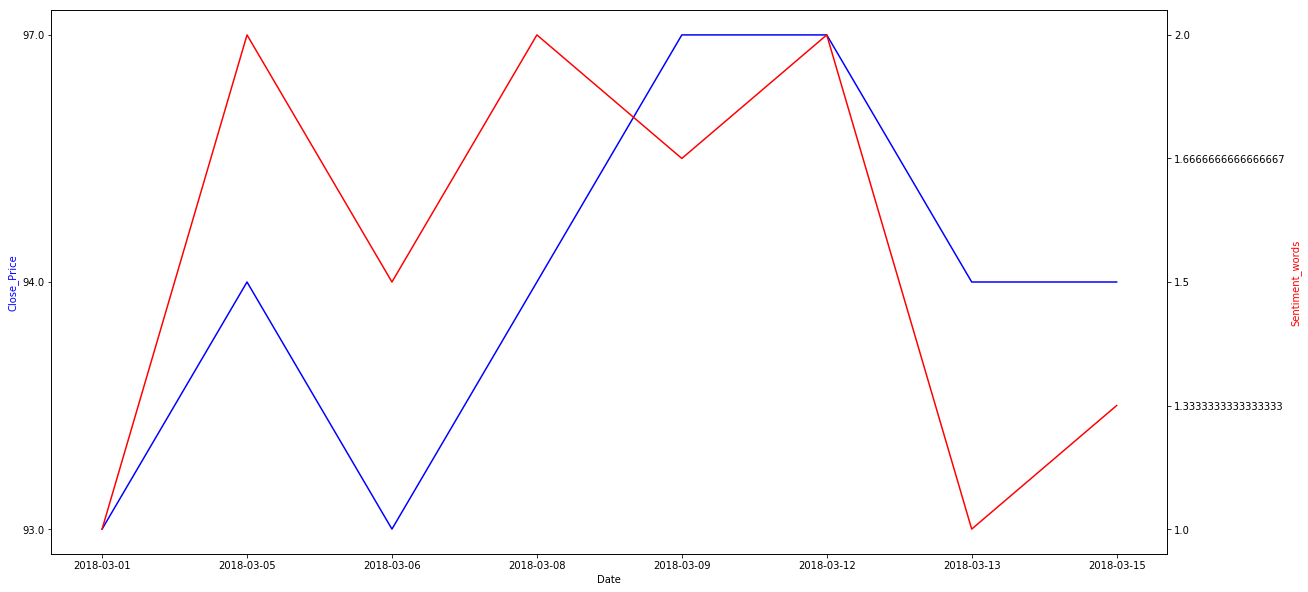

Text(0.5,0,'Date')

Text(0,0.5,'Close_Price')

Text(0,0.5,'Sentiment_words')

Netflix


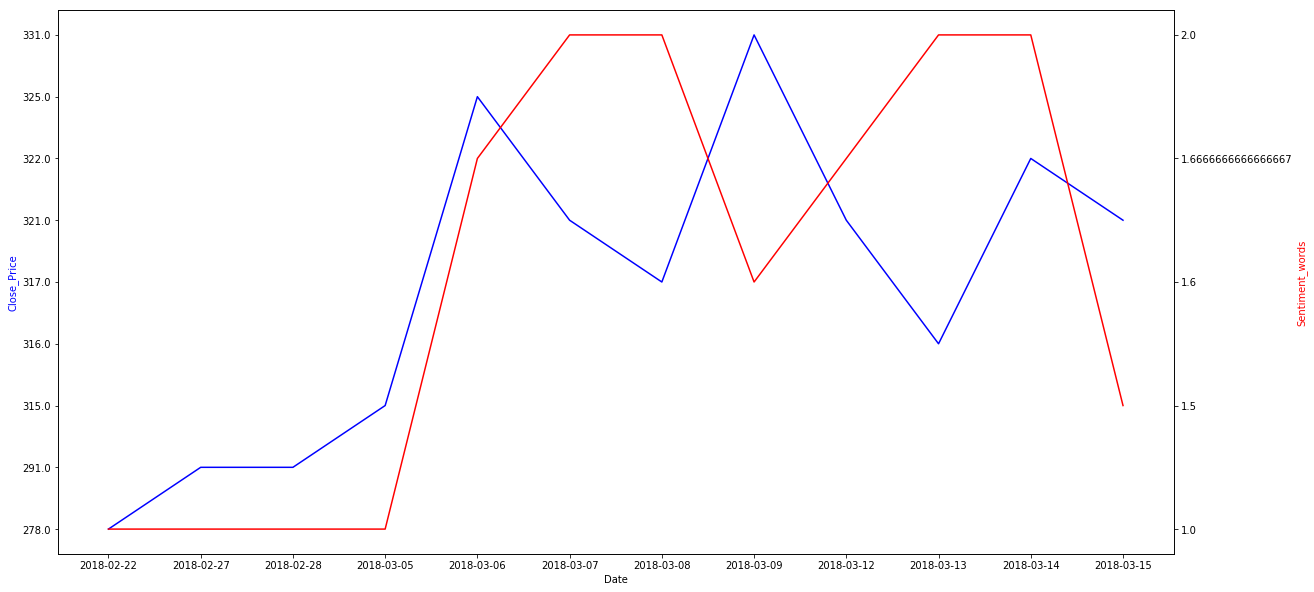

Text(0.5,0,'Date')

Text(0,0.5,'Close_Price')

Text(0,0.5,'Sentiment_words')

amazon


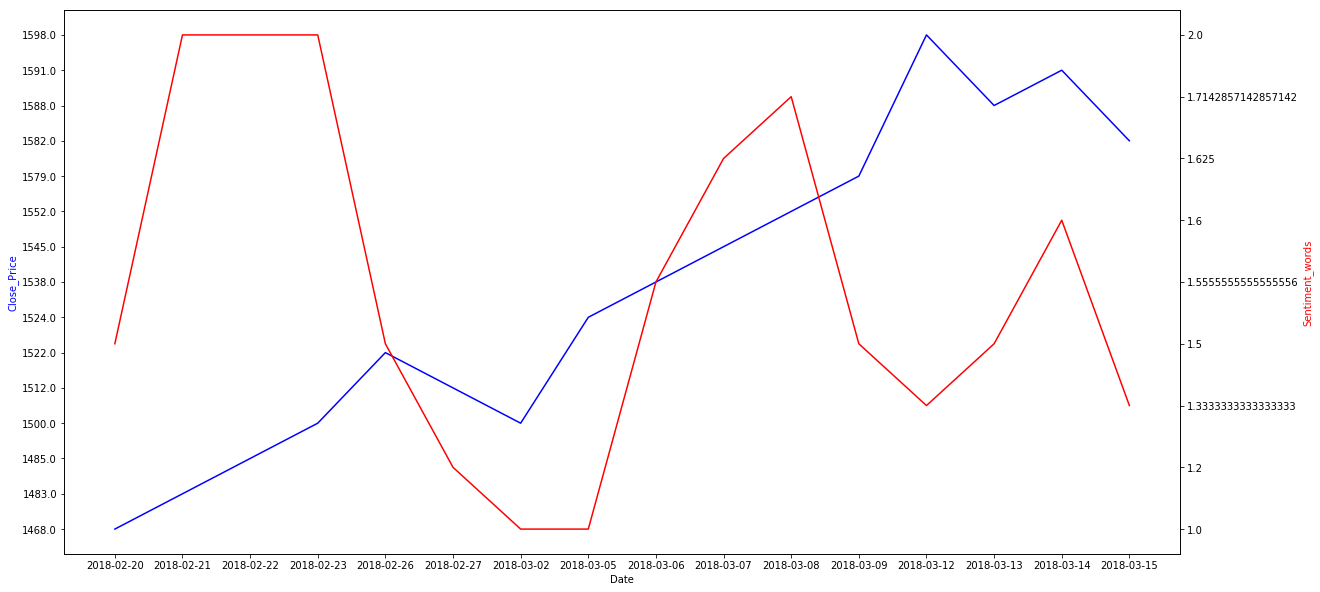

Text(0.5,0,'Date')

Text(0,0.5,'Close_Price')

Text(0,0.5,'Sentiment_words')

Boeing


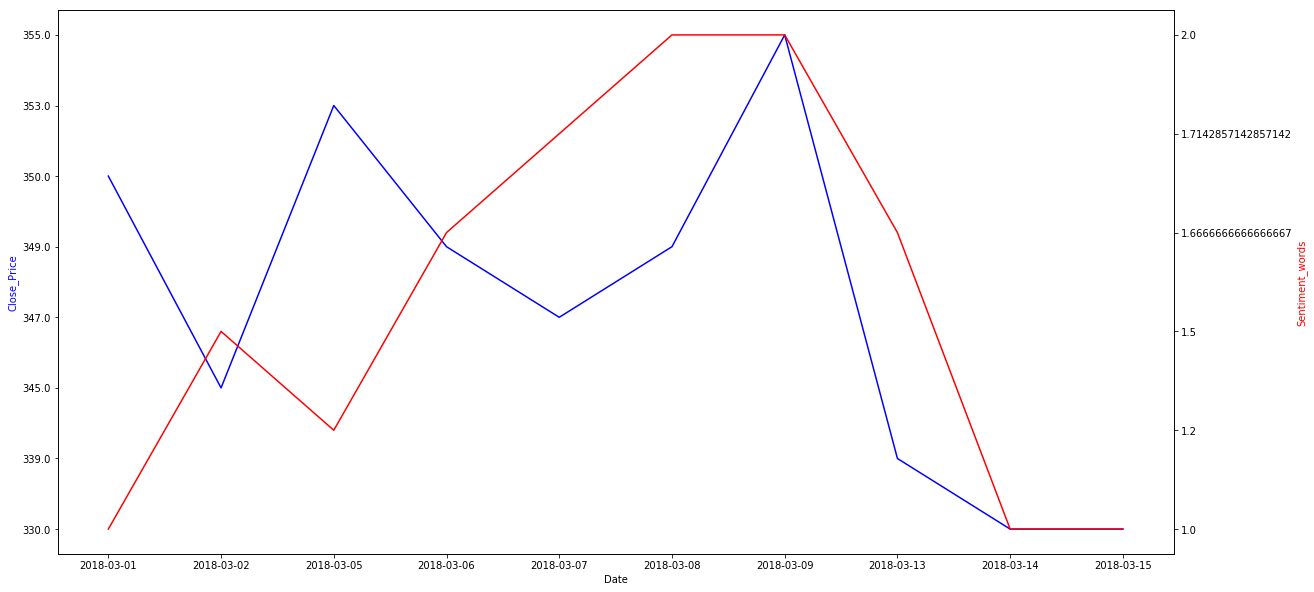

Text(0.5,0,'Date')

Text(0,0.5,'Close_Price')

Text(0,0.5,'Sentiment_words')

Google


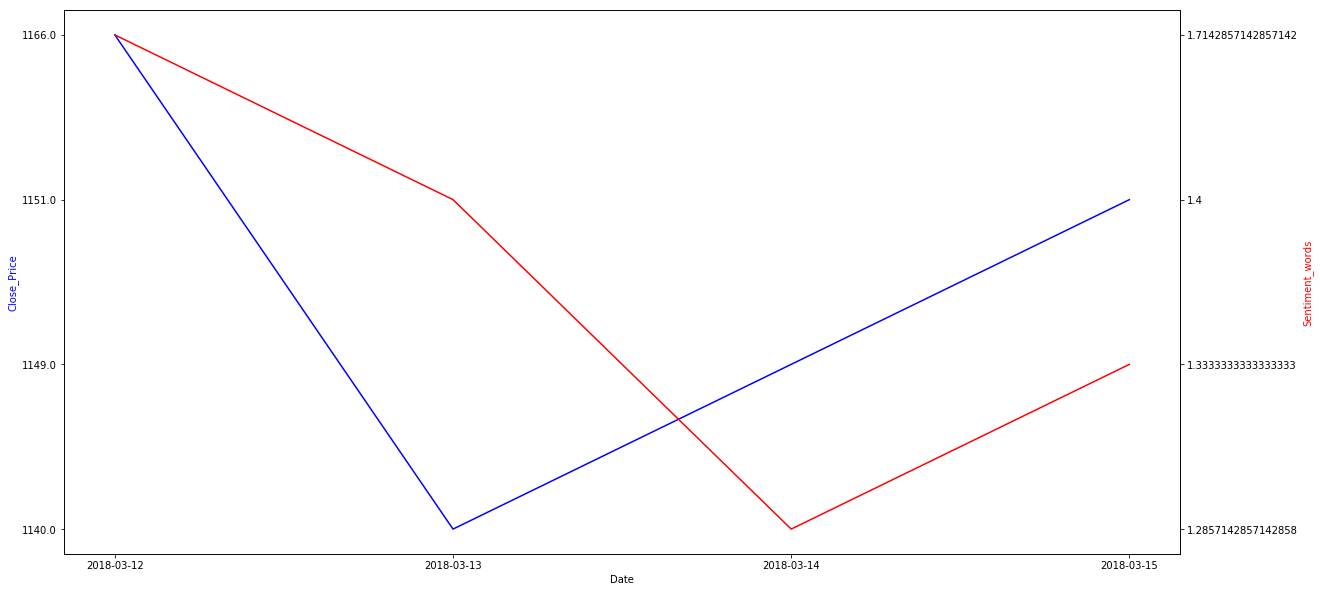

Text(0.5,0,'Date')

Text(0,0.5,'Close_Price')

Text(0,0.5,'Sentiment_words')

Facebook


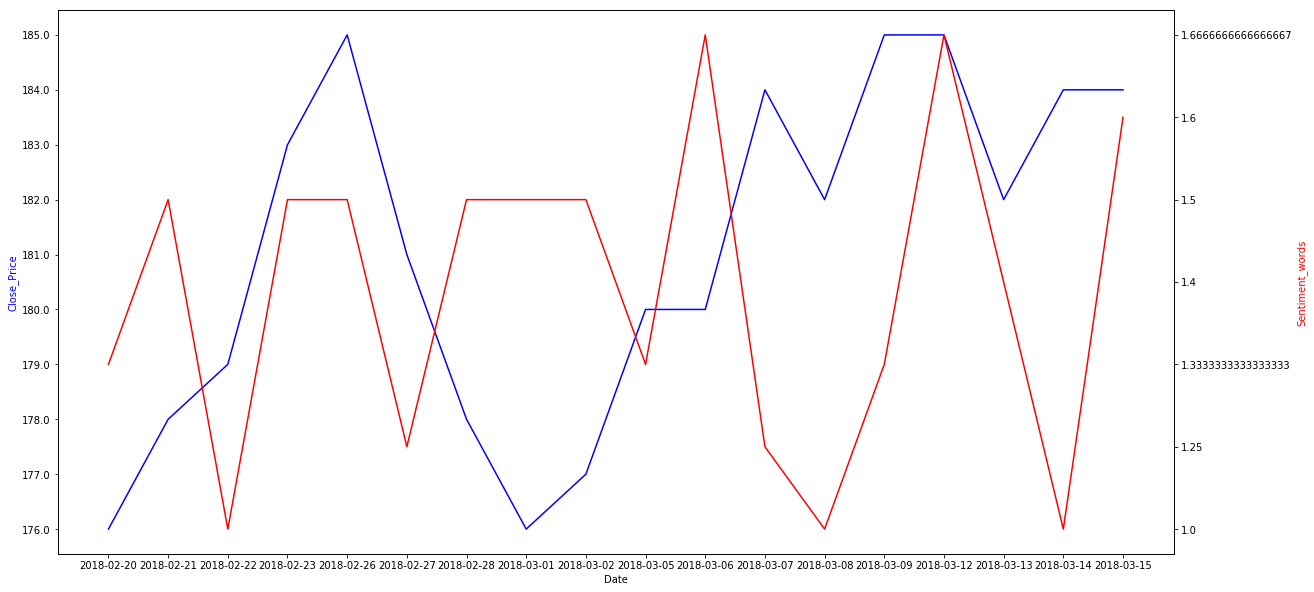

In [6]:

#Exporting data to csv
data_grpby.to_csv('new.csv')

with open('new.csv', "r",encoding="Latin1") as f:
    data=csv.reader(f, delimiter=',')

    data1 = list(data)
df1 = pd.DataFrame(data1[1:], index = None, columns=['company','date','close','final_sentiment','sentiment_words'] ,)

#reference:https://matplotlib.org/examples/api/two_scales.html
#getting graph for sentiment using words
list_to_use1 = ['Microsoft','Netflix','amazon','Boeing','Google','Facebook']
for company in list_to_use1:
        
    data_use = df1[df1['company'] == company.lower()]
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.plot(data_use['date'], data_use['close'], 'b-')
    ax1.set_xlabel('Date')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Close_Price', color='b')
    #ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.plot(data_use['date'], data_use['sentiment_words'],'r-')
    ax2.set_ylabel('Sentiment_words', color='r')
    #ax2.tick_params('y', colors='r')

    #fig.tight_layout()
    print(company)
    plt.show()


Text(0.5,0,'Date')

Text(0,0.5,'Close_Price')

Text(0,0.5,'final_sentiment')

Microsoft


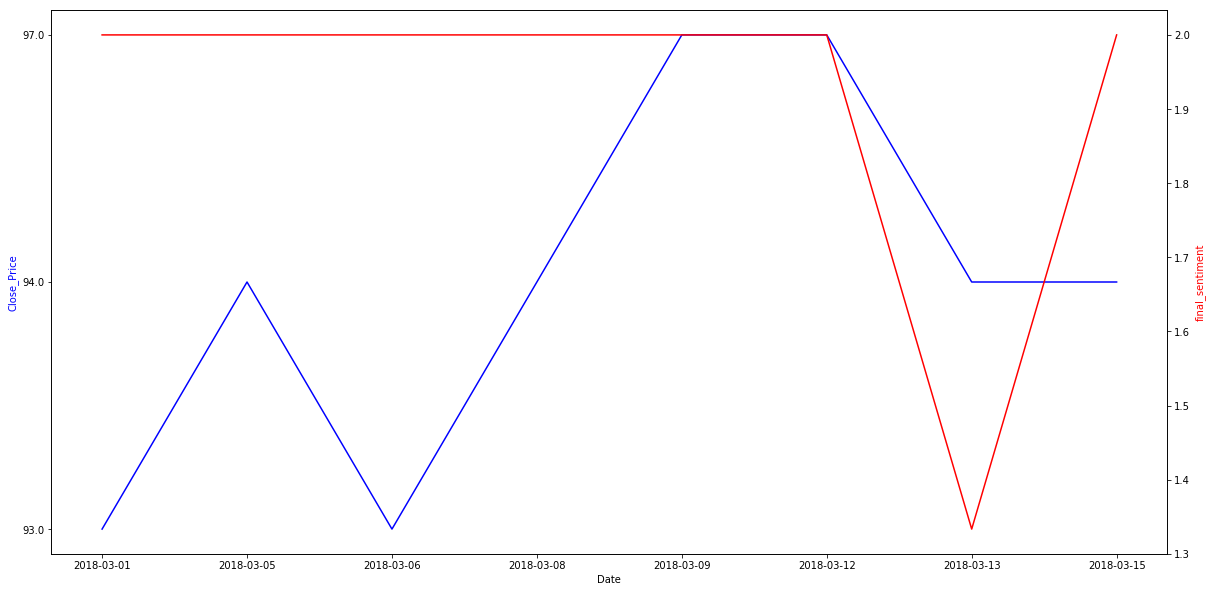

Text(0.5,0,'Date')

Text(0,0.5,'Close_Price')

Text(0,0.5,'final_sentiment')

Netflix


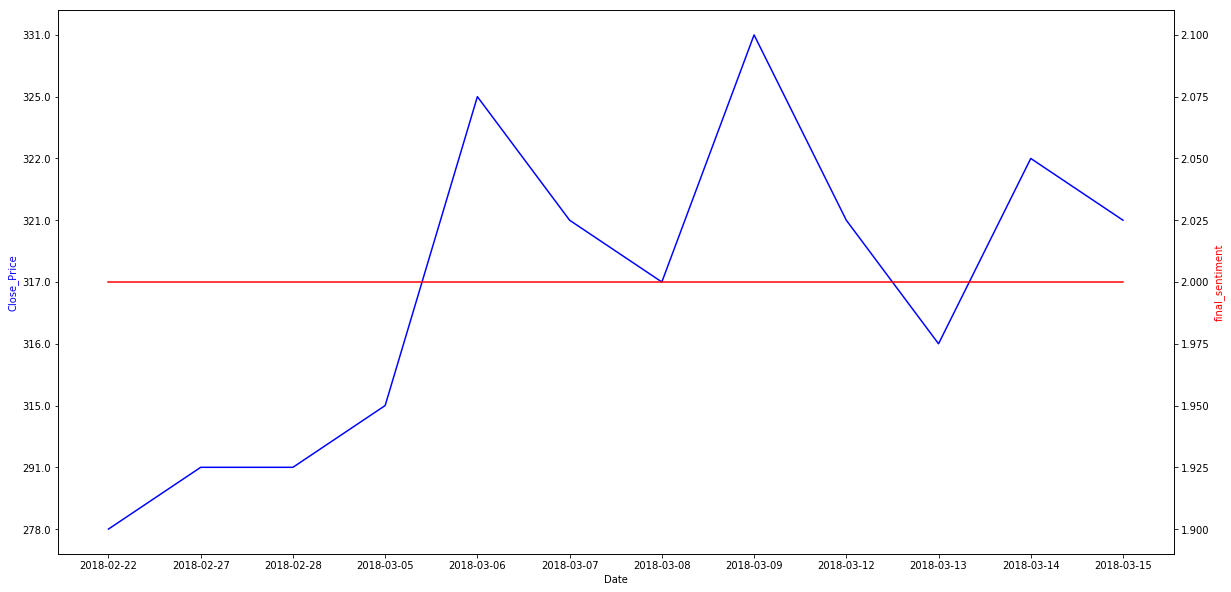

Text(0.5,0,'Date')

Text(0,0.5,'Close_Price')

Text(0,0.5,'final_sentiment')

amazon


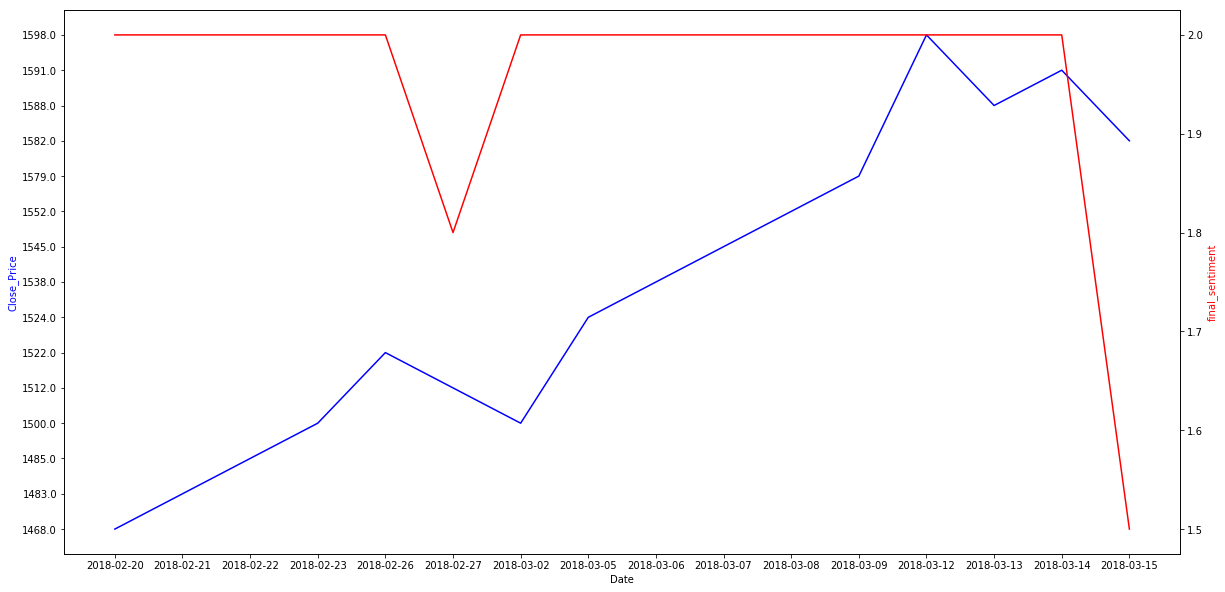

Text(0.5,0,'Date')

Text(0,0.5,'Close_Price')

Text(0,0.5,'final_sentiment')

Boeing


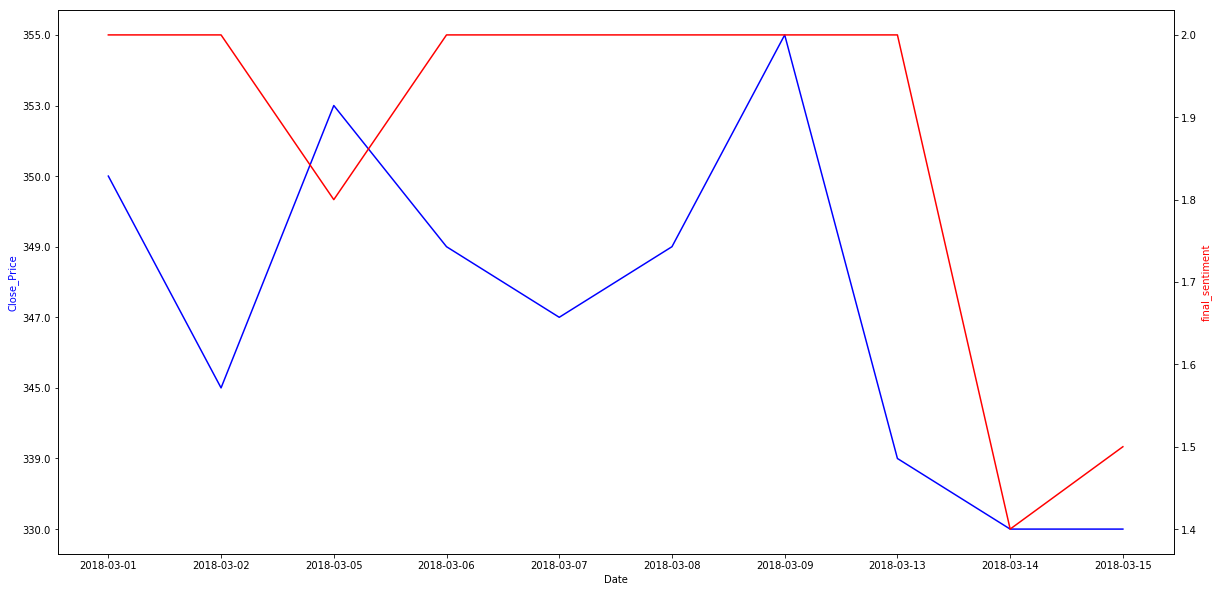

Text(0.5,0,'Date')

Text(0,0.5,'Close_Price')

Text(0,0.5,'final_sentiment')

Google


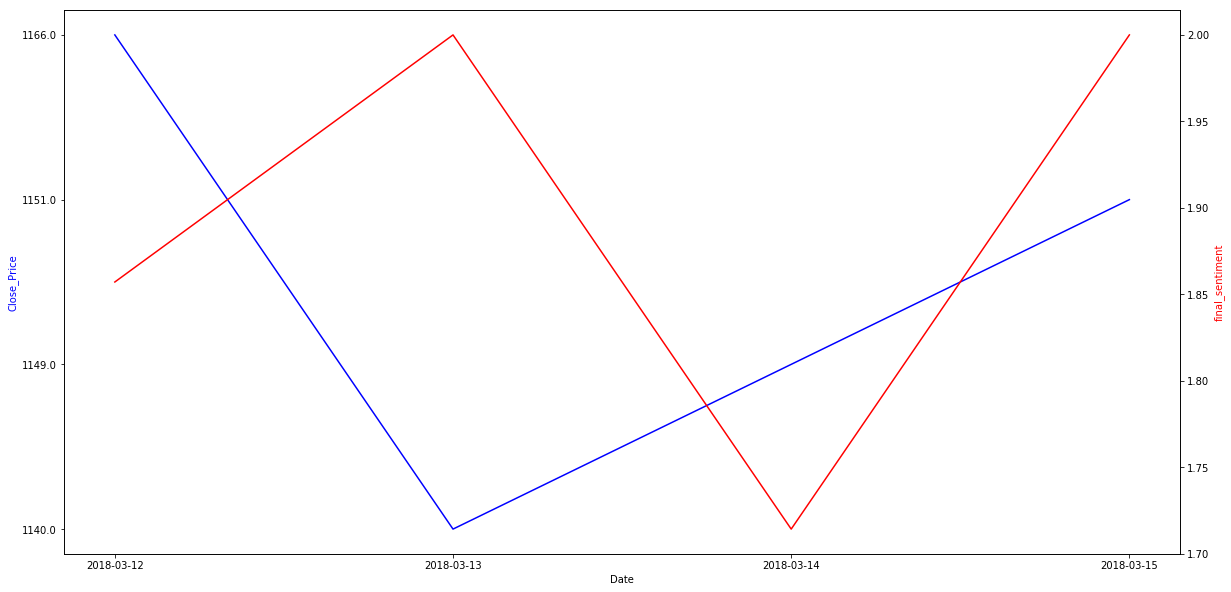

Text(0.5,0,'Date')

Text(0,0.5,'Close_Price')

Text(0,0.5,'final_sentiment')

Facebook


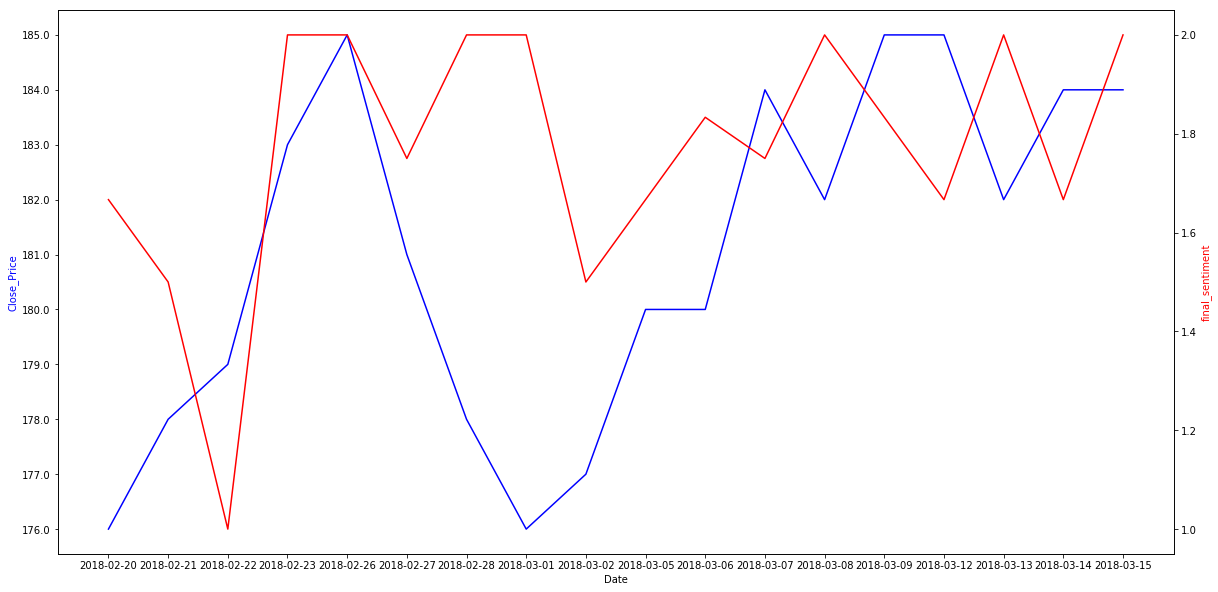

In [8]:
#Getting graphs using sentiment taken by Vader package

for company in list_to_use1:
        
    data_use = df1[df1['company'] == company.lower()]
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.plot(data_use['date'], data_use['close'], 'b-')
    ax1.set_xlabel('Date')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Close_Price', color='b')
    #ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    ax2.plot(data_use['date'], data_use['final_sentiment'],'r-')
    ax2.set_ylabel('final_sentiment', color='r')
    #ax2.tick_params('y', colors='r')

    #fig.tight_layout()
    print(company)
    plt.show()

Text(0.5,1,'Comparision between Sentiment')

Text(0.5,0,'Date')

Text(0,0.5,'Sentiments')

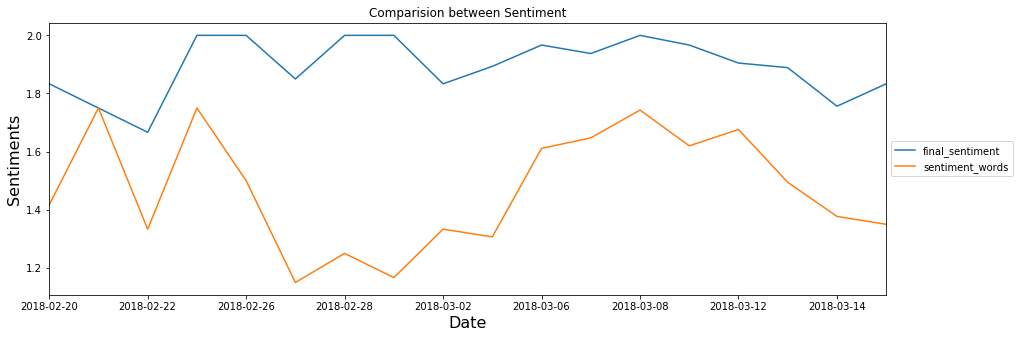

In [7]:
#Getting the graph of both the sentiments for comparision

df1[['sentiment_words','final_sentiment']] = df1[['sentiment_words','final_sentiment']].apply(pd.to_numeric)

df1.groupby('date')['final_sentiment','sentiment_words'].mean().plot(kind='line', figsize=(15,5)).\
        legend(loc='center left', bbox_to_anchor=(1, 0.5));  # set legend
plt.title('Comparision between Sentiment')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Sentiments', fontsize=16)
plt.show()